In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers,models
print(tf.__version__)

2.17.1


Loading the dataset

In [2]:
# Path to the dataset
dataset_path = '/content/drive/MyDrive/animal_data'
# Load the dataset
dataset = tf.keras.utils.image_dataset_from_directory(
    dataset_path,
    labels="inferred",  # Automatically infer labels from subdirectories
    label_mode="categorical",  # Can be "int", "categorical", or None
    image_size=(128, 128),  # Resize all images to this size
    batch_size=32  # Number of images per batch
)

# Check the dataset
for images, labels in dataset.take(1):
    print("Image shape:", images.shape)
    print("Labels shape:", labels.shape)


train_images, train_labels = [], []
test_images, test_labels = [], []

# Assuming the dataset is split into train and test sets, adjust accordingly
for images, labels in dataset:
    # Convert tensors to NumPy arrays
    images = images.numpy()
    labels = labels.numpy()

    # Add data to the respective lists
    # You might need to adjust this based on how your dataset is structured
    # (e.g., if you have a separate test set, handle it accordingly)
    train_images.extend(images)
    train_labels.extend(labels)
    test_images.extend(images)
    test_labels.extend(labels)

# Convert lists to NumPy arrays
train_images = np.array(train_images)
train_labels = np.array(train_labels)
test_images = np.array(test_images)
test_labels = np.array(test_labels)

Found 1944 files belonging to 15 classes.
Image shape: (32, 128, 128, 3)
Labels shape: (32, 15)


In [3]:
class_name=['Bear','Bird','Cat','Cow','Deer','Dog','Dolphin','Elephant','Giraffe','Horse','Kangaroo','Lion','Panda','Tiger','Zebra']

In [4]:
train_images.shape

(1944, 128, 128, 3)

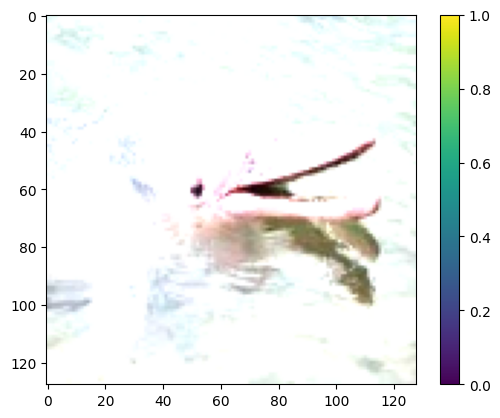

In [32]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [6]:
train_images=train_images/128
test_images=test_images/128
test_images.shape


(1944, 128, 128, 3)

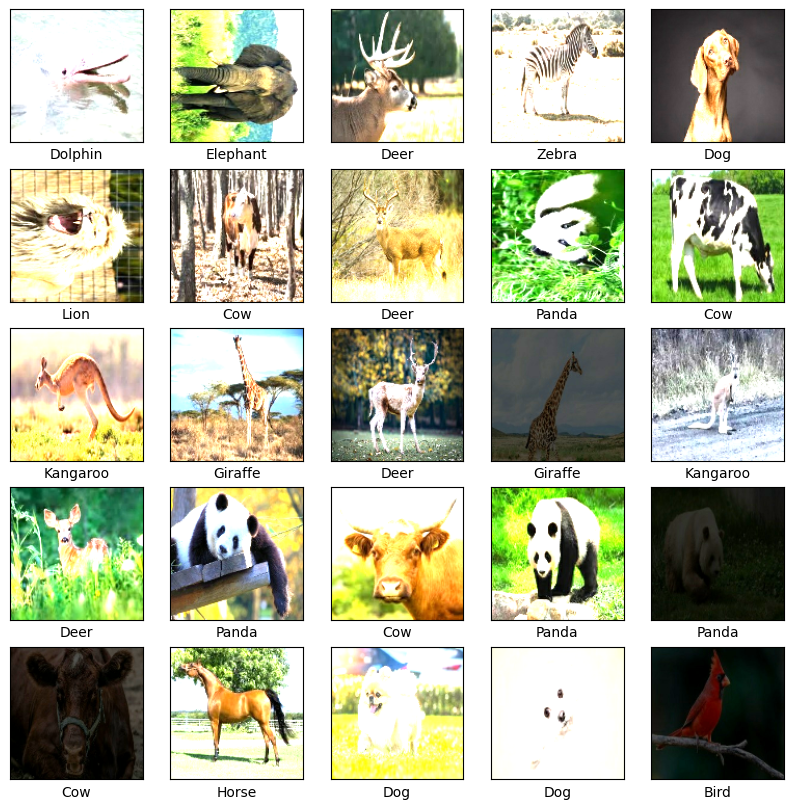

In [7]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    #plt.xlabel(class_name[train_labels[i]])
    predicted_label_index = np.argmax(train_labels[i])
    plt.xlabel(class_name[predicted_label_index])
plt.show()

In [33]:

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(15,activation='softmax')])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [10]:
model.fit(train_images, train_labels, epochs=20)

Epoch 1/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 63s 999ms/step - accuracy: 0.1047 - loss: 2.7844
Epoch 2/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 81s 972ms/step - accuracy: 0.2478 - loss: 2.3457
Epoch 3/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 82s 989ms/step - accuracy: 0.3956 - loss: 1.8682
Epoch 4/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 82s 984ms/step - accuracy: 0.5136 - loss: 1.5509
Epoch 5/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 82s 994ms/step - accuracy: 0.6684 - loss: 1.1255
Epoch 6/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 82s 998ms/step - accuracy: 0.7619 - loss: 0.8664
Epoch 7/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 81s 980ms/step - accuracy: 0.8116 - loss: 0.6296
Epoch 8/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 83s 996ms/step - accuracy: 0.8598 - loss: 0.5155
Epoch 9/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 81s 975ms/step - accuracy: 0.8667 - loss: 0.4242
Epoch 10/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 85s 1s/step - accuracy: 0.9066 - loss: 0.3389
Epoch 11/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 80s 972ms/step - accuracy: 0.9246 - loss: 0.2678
Epoch 12/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 83s 1

Testing Accuracy and Loss of the model

In [11]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

61/61 - 17s - 280ms/step - accuracy: 0.9949 - loss: 0.0266

Test accuracy: 0.9948559403419495


In [12]:
probability_model = tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()])

Making predictions with the model

In [13]:
predictions = probability_model.predict(test_images)

61/61 ━━━━━━━━━━━━━━━━━━━━ 24s 388ms/step


In [14]:
predictions[0]

array([0.05981549, 0.05981706, 0.05981553, 0.05981551, 0.05981549,
       0.05982083, 0.16257611, 0.05981549, 0.05981549, 0.05981549,
       0.05981551, 0.05981549, 0.05981553, 0.05981549, 0.05981549],
      dtype=float32)

The model correctly predicts the given image

In [15]:
np.argmax(predictions[0])

6

In [26]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)
  true_label_index = np.argmax(true_label)
  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label_index:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_name[predicted_label],
                                100*np.max(predictions_array),
                                class_name[true_label_index]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(len(predictions_array)))
  plt.yticks([])
  thisplot = plt.bar(range(len(predictions_array)), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  true_label_index = np.argmax(true_label)
  thisplot[true_label_index].set_color('blue')


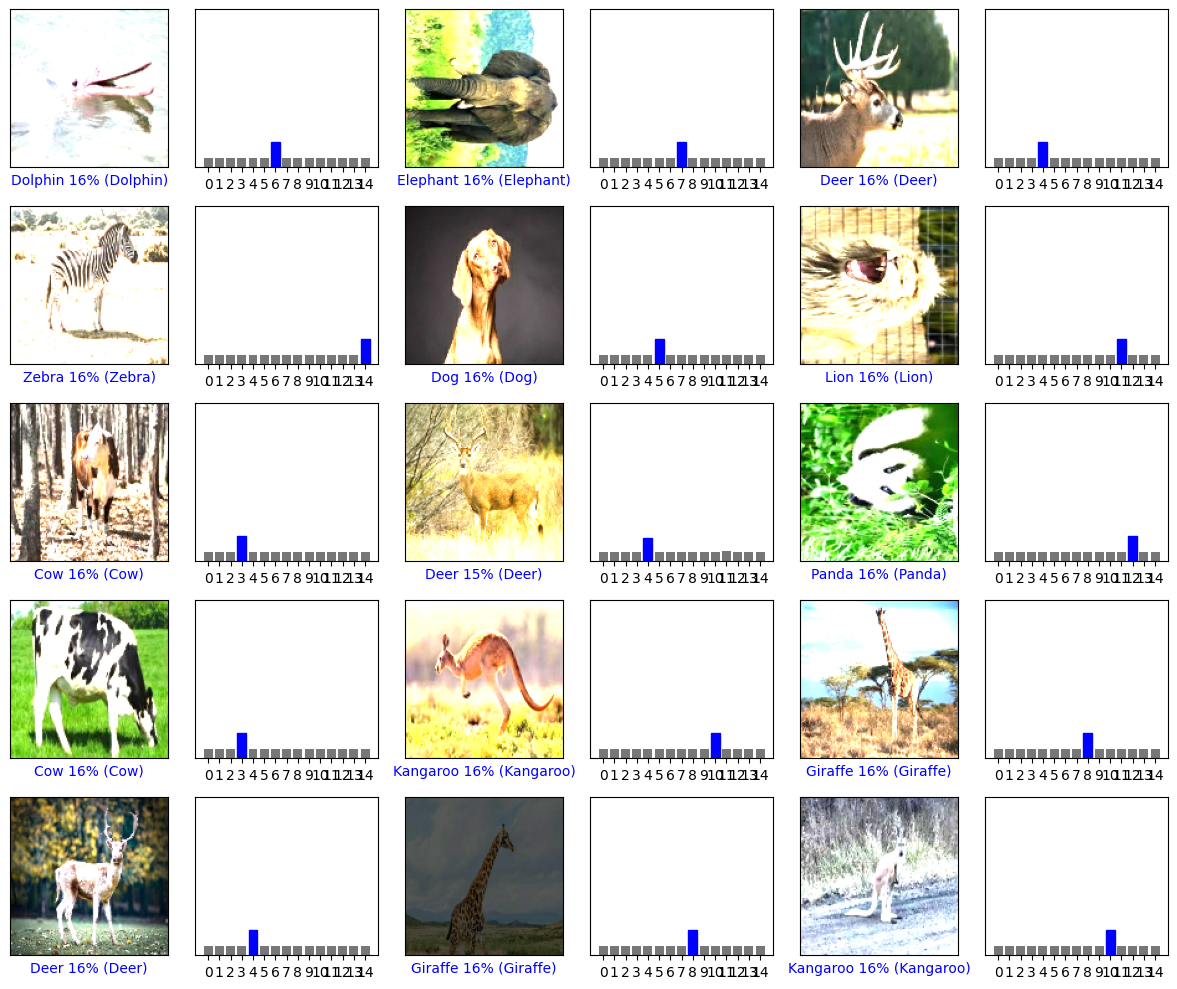

In [27]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

Using Trained Model

In [28]:
img = test_images[1]

print(img.shape)

(128, 128, 3)


In [29]:
img = (np.expand_dims(img,0))

print(img.shape)

(1, 128, 128, 3)


In [30]:
predictions_single = probability_model.predict(img)

print(predictions_single)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
[[0.05981476 0.05981476 0.05981476 0.05981476 0.05981476 0.05981476
  0.05981476 0.16259338 0.05981476 0.05981476 0.05981476 0.05981476
  0.05981476 0.05981476 0.05981476]]


In [35]:
np.argmax(predictions[4])

5

The model is making correct predictions and has an accuracy of 99.4%